<a href="https://www.kaggle.com/code/manthanvarmas/qs-ranking-analysis?scriptVersionId=247280546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/kaggle/input/2026-qs-world-university-rankings/2026 QS World University Rankings.csv")
df.head()

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,100.0,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100
1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,99.6,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,100.0,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7


In [3]:
df_clean = df.copy()

rank_columns = [col for col in df_clean.columns if "Rank" in col or "SCORE" in col]
for col in rank_columns:
    if df_clean[col].dtype == object:
        df_clean[col] = df_clean[col].astype(str).str.replace("=", "", regex=False)
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean["Overall SCORE"] = pd.to_numeric(df_clean["Overall SCORE"], errors='coerce')

missing_values = df_clean.isnull().sum()
missing_values = missing_values[missing_values > 0]

In [4]:
print("Data types after cleaning:\n", df_clean.dtypes)
print("\nMissing values:\n", missing_values)

Data types after cleaning:
 2026 Rank            float64
Previous Rank        float64
Institution Name      object
Country/Territory     object
Region                object
Size                  object
Focus                 object
Research              object
Status                object
AR SCORE             float64
AR RANK               object
ER SCORE             float64
ER RANK               object
FSR SCORE            float64
FSR RANK              object
CPF SCORE            float64
CPF RANK              object
IFR SCORE            float64
IFR RANK              object
ISR SCORE            float64
ISR RANK              object
ISD SCORE            float64
ISD RANK              object
IRN SCORE            float64
IRN RANK              object
EO SCORE             float64
EO RANK               object
SUS SCORE            float64
SUS RANK              object
Overall SCORE        float64
dtype: object

Missing values:
 2026 Rank        798
Previous Rank    906
Size               1
Researc

In [5]:
rank_columns = [col for col in df_clean.columns if "RANK" in col]
for col in rank_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

df_clean = df_clean.dropna(subset=["2026 Rank", "Overall SCORE"])

df_clean["Status"] = df_clean["Status"].fillna("Unknown")
df_clean["Size"] = df_clean["Size"].fillna("Unknown")
df_clean["Research"] = df_clean["Research"].fillna("Unknown")

score_columns = [col for col in df_clean.columns if "SCORE" in col]
for col in score_columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

for col in rank_columns:
    max_val = df_clean[col].max()
    if pd.notnull(max_val):
        df_clean[col] = df_clean[col].fillna(max_val + 1)

print("✅ Remaining missing values:", df_clean.isnull().sum().sum())

✅ Remaining missing values: 111


In [6]:
# Show columns with remaining missing values
df_clean.isnull().sum()[df_clean.isnull().sum() > 0]

Previous Rank    111
dtype: int64

In [7]:
df_clean = df_clean.dropna(subset=["Previous Rank"])

In [8]:
top_10 = df_clean.sort_values("2026 Rank").head(10)
print("Top 10 Universities in 2026:\n")
print(top_10[["2026 Rank", "Institution Name", "Country/Territory", "Overall SCORE"]])

Top 10 Universities in 2026:

   2026 Rank                                   Institution Name  \
0        1.0        Massachusetts Institute of Technology (MIT)   
1        2.0                            Imperial College London   
2        3.0                                Stanford University   
3        4.0                               University of Oxford   
4        5.0                                 Harvard University   
5        6.0                            University of Cambridge   
6        7.0  ETH Zurich (Swiss Federal Institute of Technol...   
7        8.0             National University of Singapore (NUS)   
8        9.0                    UCL (University College London)   
9       10.0       California Institute of Technology (Caltech)   

          Country/Territory  Overall SCORE  
0  United States of America          100.0  
1            United Kingdom           99.4  
2  United States of America           98.9  
3            United Kingdom           97.9  
4  Unit

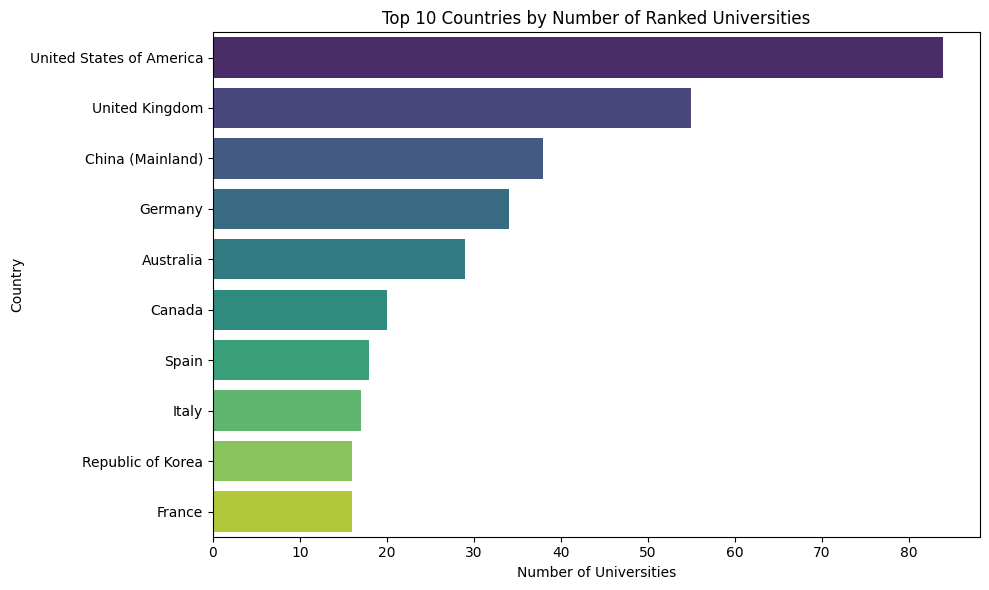

In [9]:
country_counts = df_clean["Country/Territory"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Countries by Number of Ranked Universities")
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

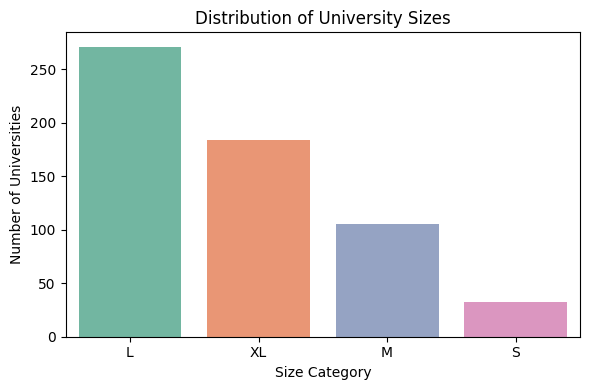

In [10]:
size_counts = df_clean["Size"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=size_counts.index, y=size_counts.values, palette="Set2")
plt.title("Distribution of University Sizes")
plt.ylabel("Number of Universities")
plt.xlabel("Size Category")
plt.tight_layout()
plt.show()

In [11]:
focus_research_ct = pd.crosstab(df_clean["Focus"], df_clean["Research"])
print("University Focus vs Research Output:\n")
print(focus_research_ct)

University Focus vs Research Output:

Research  HI  MD   VH
Focus                
CO         5   0  145
FC        25   4  295
FO         2   0   97
SP         0   1   18


In [12]:
top_by_region = df_clean.loc[df_clean.groupby("Region")["2026 Rank"].idxmin()]
print("Top University in Each Region:\n")
print(top_by_region[["Region", "Institution Name", "2026 Rank", "Country/Territory"]].sort_values("2026 Rank"))

Top University in Each Region:

       Region                             Institution Name  2026 Rank  \
0    Americas  Massachusetts Institute of Technology (MIT)        1.0   
1      Europe                      Imperial College London        2.0   
7        Asia       National University of Singapore (NUS)        8.0   
18    Oceania                  The University of Melbourne       19.0   
149    Africa                      University of Cape Town      150.0   

            Country/Territory  
0    United States of America  
1              United Kingdom  
7                   Singapore  
18                  Australia  
149              South Africa  


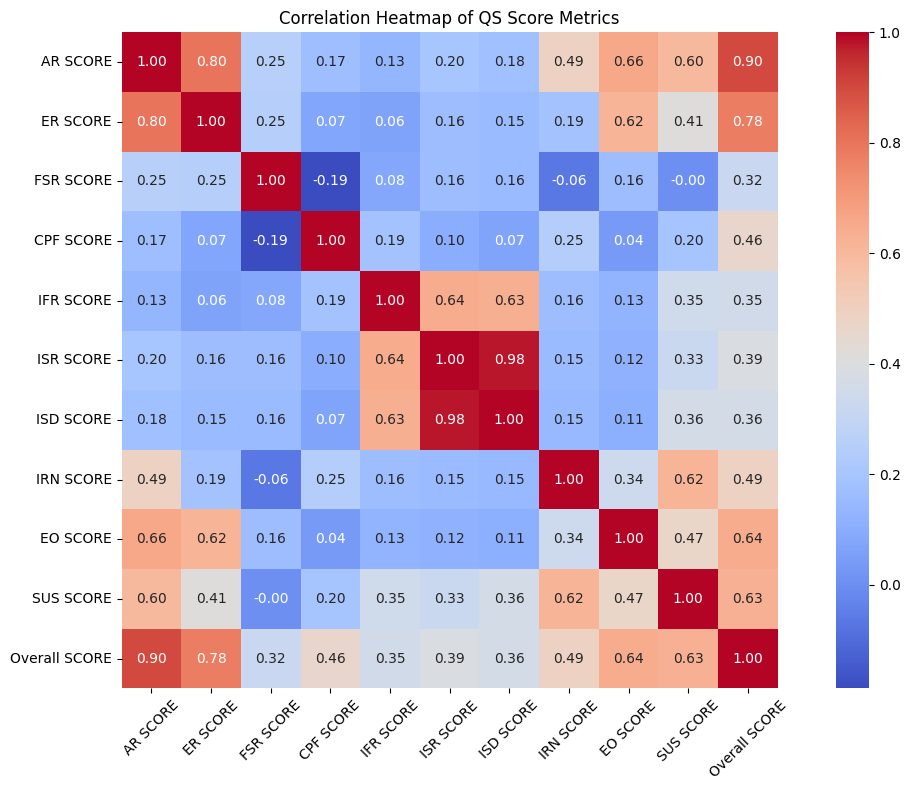

In [13]:
score_cols = [col for col in df_clean.columns if "SCORE" in col]
score_data = df_clean[score_cols]

corr_matrix = score_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of QS Score Metrics")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
overall_corr = corr_matrix["Overall SCORE"].sort_values(ascending=False)
print("Correlation of Metrics with Overall SCORE:\n")
print(overall_corr)

Correlation of Metrics with Overall SCORE:

Overall SCORE    1.000000
AR SCORE         0.898294
ER SCORE         0.781173
EO SCORE         0.644580
SUS SCORE        0.632822
IRN SCORE        0.493434
CPF SCORE        0.460835
ISR SCORE        0.391313
ISD SCORE        0.363174
IFR SCORE        0.353848
FSR SCORE        0.318452
Name: Overall SCORE, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

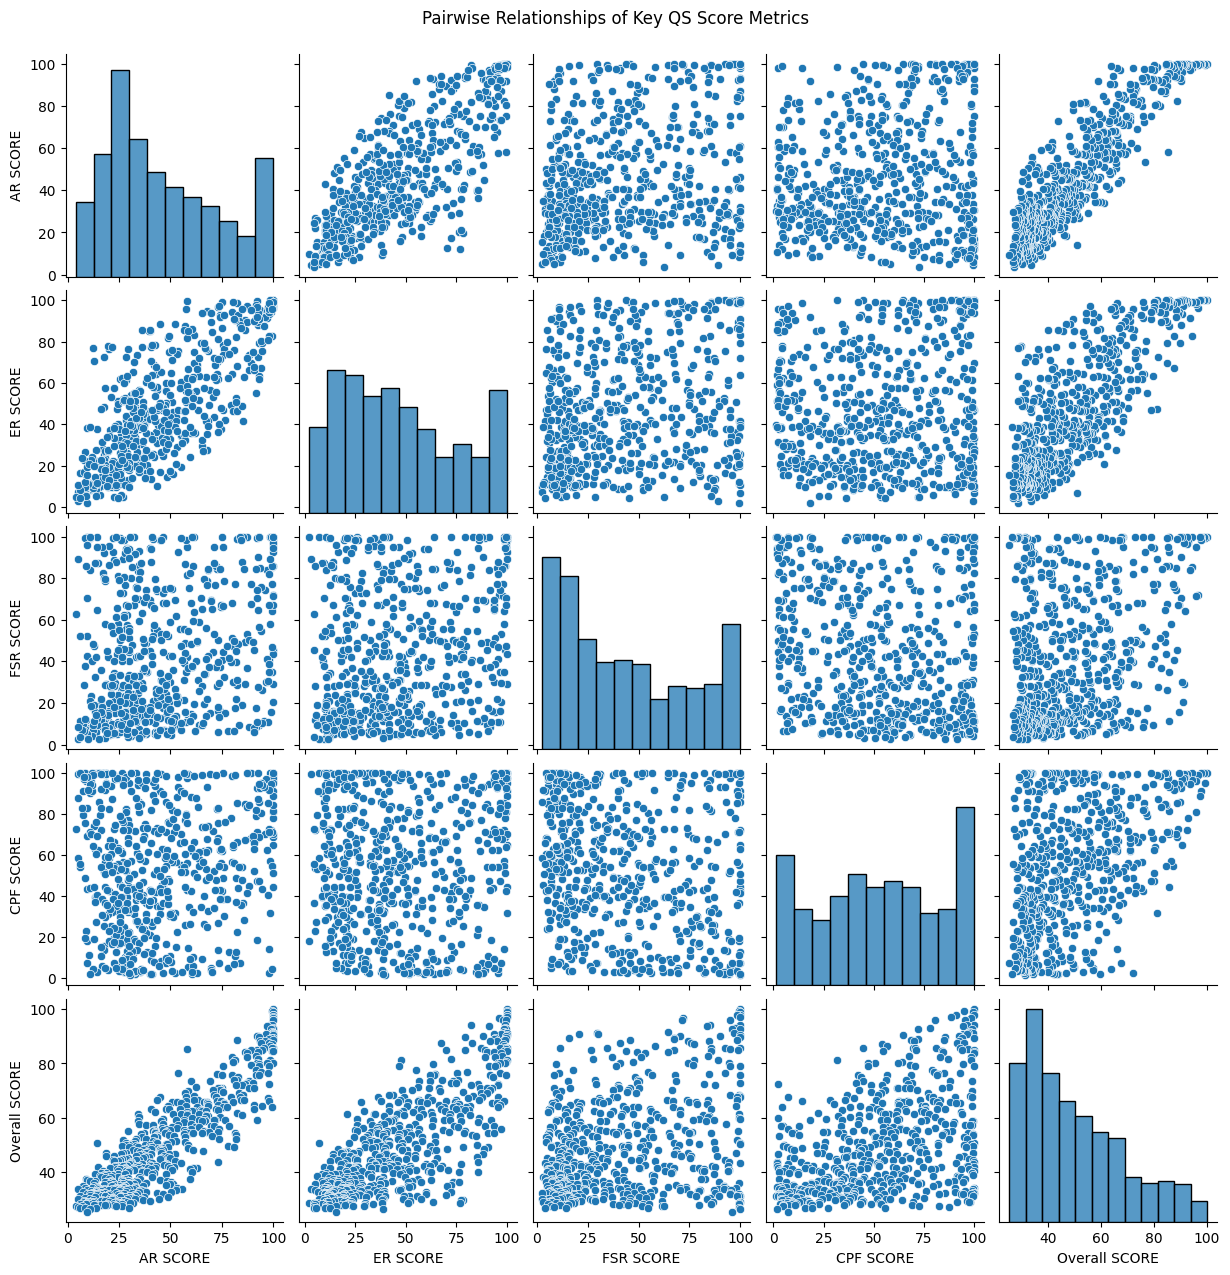

In [15]:
key_metrics = ["AR SCORE", "ER SCORE", "FSR SCORE", "CPF SCORE", "Overall SCORE"]
sns.pairplot(df_clean[key_metrics])
plt.suptitle("Pairwise Relationships of Key QS Score Metrics", y=1.02)
plt.show()

In [16]:
df_clean["Rank Change"] = df_clean["Previous Rank"] - df_clean["2026 Rank"]

rank_change_df = df_clean[["Institution Name", "Country/Territory", "Previous Rank", "2026 Rank", "Rank Change"]]

In [17]:
top_improved = rank_change_df.sort_values("Rank Change", ascending=False).head(10)
print("Top 10 Most Improved Universities:\n")
print(top_improved)

Top 10 Most Improved Universities:

                                      Institution Name     Country/Territory  \
411                                  Sunway University              Malaysia   
403                                 Sabanci University               Türkiye   
390                               Abu Dhabi University  United Arab Emirates   
329                              University of Sharjah  United Arab Emirates   
460          Jordan University of Science & Technology                Jordan   
502  Shoolini University of Biotechnology and Manag...                 India   
515                    Universitas Padjadjaran (UNPAD)             Indonesia   
447                               Universität Bayreuth               Germany   
322                                     Koc University               Türkiye   
470  Tashkent Institute of Irrigation and Agricultu...            Uzbekistan   

     Previous Rank  2026 Rank  Rank Change  
411          539.0      410.0        1

In [18]:
top_declined = rank_change_df.sort_values("Rank Change").head(10)
print("Top 10 Universities with Most Declined Ranks:\n")
print(top_declined)

Top 10 Universities with Most Declined Ranks:

                                      Institution Name  \
626                                 Yeshiva University   
607                            University of Tennessee   
688                       Tomsk Polytechnic University   
487       Technische Universität Bergakademie Freiberg   
620                               Zhengzhou University   
590    American University of Ras Al Khaimah ( AURAK )   
641                             University of Fribourg   
629      Missouri University of Science and Technology   
593  National Research Nuclear University MEPhI (Mo...   
639                            Universidad de Zaragoza   

            Country/Territory  Previous Rank  2026 Rank  Rank Change  
626  United States of America          413.0      624.0       -211.0  
607  United States of America          481.0      607.0       -126.0  
688        Russian Federation          576.0      688.0       -112.0  
487                   Germany 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


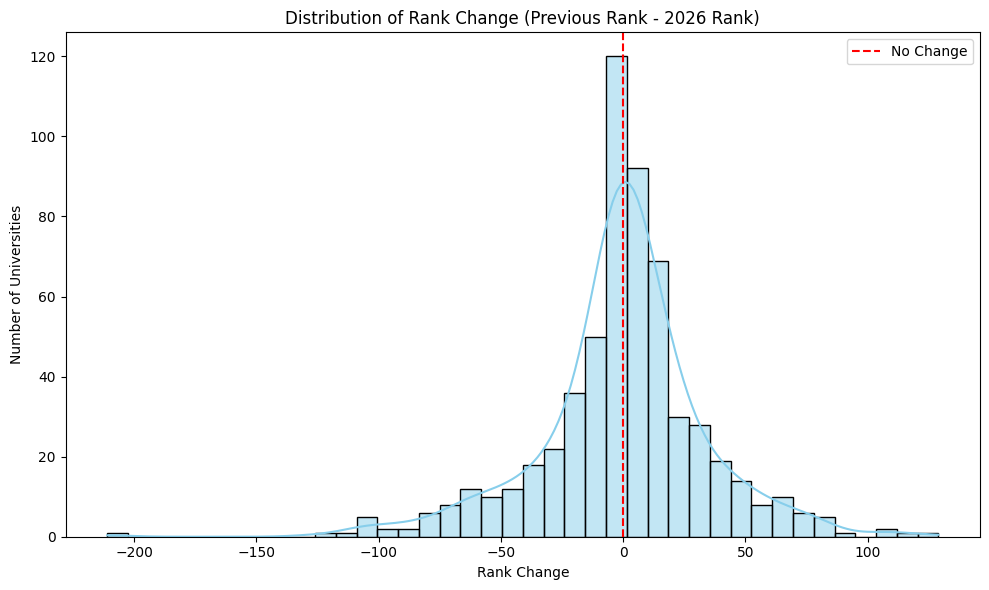

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean["Rank Change"], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Rank Change (Previous Rank - 2026 Rank)")
plt.xlabel("Rank Change")
plt.ylabel("Number of Universities")
plt.axvline(0, color='red', linestyle='--', label='No Change')
plt.legend()
plt.tight_layout()
plt.show()

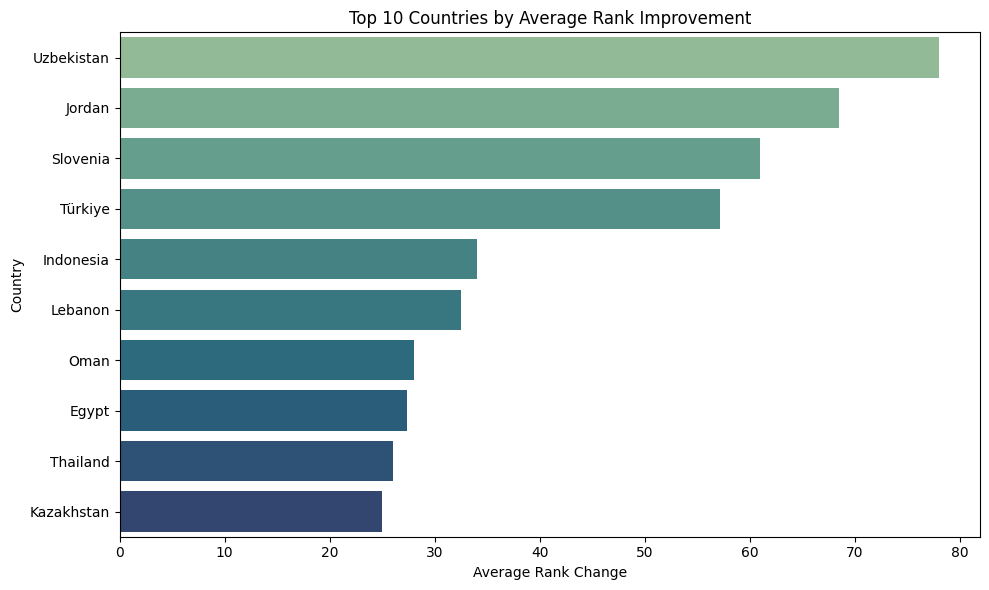

In [20]:
avg_rank_change_by_country = df_clean.groupby("Country/Territory")["Rank Change"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rank_change_by_country.values, y=avg_rank_change_by_country.index, palette="crest")
plt.title("Top 10 Countries by Average Rank Improvement")
plt.xlabel("Average Rank Change")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [21]:
score_cols = [col for col in df_clean.columns if "SCORE" in col]
X = df_clean[score_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)

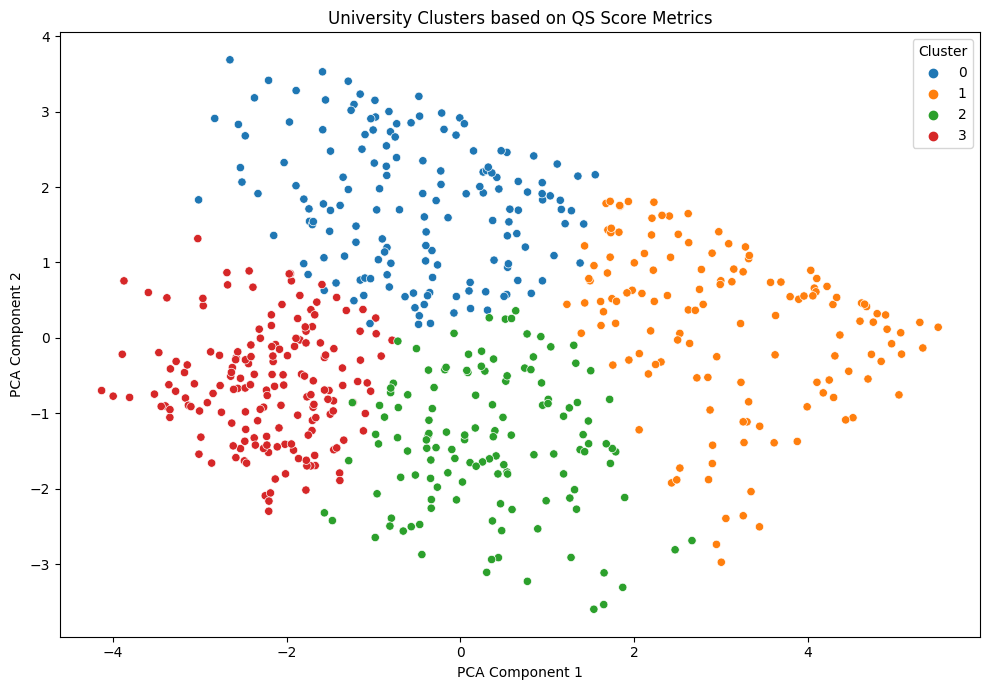

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_clean["PCA1"] = X_pca[:, 0]
df_clean["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue="Cluster", palette="tab10")
plt.title("University Clusters based on QS Score Metrics")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [24]:
cluster_counts = df_clean["Cluster"].value_counts()
print("Number of Universities per Cluster:\n", cluster_counts)

cluster_means = df_clean.groupby("Cluster")[score_cols].mean()
print("\nAverage Scores by Cluster:\n")
print(cluster_means.round(2))

Number of Universities per Cluster:
 Cluster
3    171
0    154
1    136
2    131
Name: count, dtype: int64

Average Scores by Cluster:

         AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  \
Cluster                                                                   
0           26.56     28.24      38.06      47.09      80.20      76.91   
1           79.40     77.08      58.33      72.13      81.54      82.56   
2           60.36     59.72      42.80      44.24      40.07      26.92   
3           27.43     29.80      36.99      50.23      27.29      19.04   

         ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE  Overall SCORE  
Cluster                                                            
0            76.66      67.03     31.23      67.15          40.74  
1            79.92      89.71     75.43      84.08          76.62  
2            30.15      79.33     68.21      74.03          54.22  
3            21.19      64.50     27.11      54.72          34.98  


In [25]:
feature_cols = [col for col in df_clean.columns if "SCORE" in col and col != "Overall SCORE"]
X = df_clean[feature_cols]
y = df_clean["Overall SCORE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.29
R² Score: 0.9991


Feature Importance (Coefficient Weights):

AR SCORE     0.312226
CPF SCORE    0.206233
ER SCORE     0.153362
FSR SCORE    0.102644
EO SCORE     0.051996
IRN SCORE    0.051498
IFR SCORE    0.051164
SUS SCORE    0.050271
ISR SCORE    0.048345
ISD SCORE    0.004960
dtype: float64


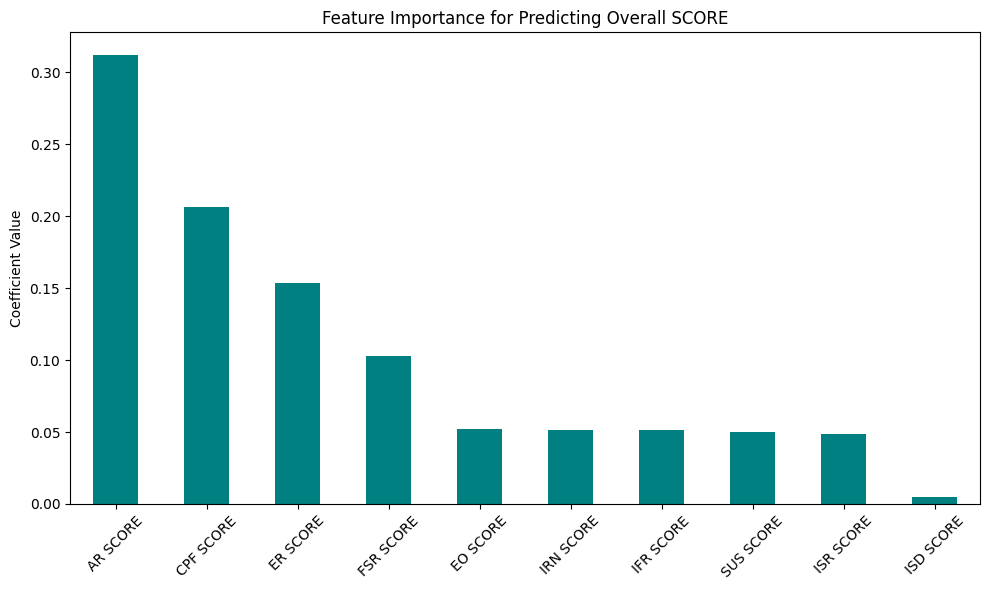

In [27]:
coeffs = pd.Series(lr.coef_, index=feature_cols).sort_values(ascending=False)
print("Feature Importance (Coefficient Weights):\n")
print(coeffs)

plt.figure(figsize=(10,6))
coeffs.plot(kind='bar', color='teal')
plt.title("Feature Importance for Predicting Overall SCORE")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()